In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
284,-122.17,37.78,42.0,1524.0,260.0,651.0,267.0,3.6875,NEAR BAY,157300.0
14129,-117.09,32.75,20.0,1701.0,503.0,1482.0,465.0,1.6789,NEAR OCEAN,95500.0
18069,-122.02,37.29,25.0,3845.0,492.0,1461.0,475.0,10.3979,<1H OCEAN,500001.0
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,<1H OCEAN,205300.0
17641,-121.90,37.25,28.0,2714.0,502.0,1389.0,490.0,5.7385,<1H OCEAN,240400.0
...,...,...,...,...,...,...,...,...,...,...
196,-122.22,37.77,52.0,391.0,128.0,520.0,138.0,1.6471,NEAR BAY,95000.0
11201,-117.92,33.83,17.0,382.0,86.0,272.0,81.0,1.4250,<1H OCEAN,212500.0
9407,-122.56,37.90,36.0,1760.0,283.0,562.0,246.0,6.7546,NEAR BAY,402400.0
20152,-119.26,34.46,30.0,3826.0,691.0,1656.0,657.0,4.0074,<1H OCEAN,434700.0


In [13]:
train_data_without_op = train_data.drop(['ocean_proximity'], axis = 1)

In [14]:
train_data_without_op

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
284,-122.17,37.78,42.0,1524.0,260.0,651.0,267.0,3.6875,157300.0
14129,-117.09,32.75,20.0,1701.0,503.0,1482.0,465.0,1.6789,95500.0
18069,-122.02,37.29,25.0,3845.0,492.0,1461.0,475.0,10.3979,500001.0
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0
17641,-121.90,37.25,28.0,2714.0,502.0,1389.0,490.0,5.7385,240400.0
...,...,...,...,...,...,...,...,...,...
196,-122.22,37.77,52.0,391.0,128.0,520.0,138.0,1.6471,95000.0
11201,-117.92,33.83,17.0,382.0,86.0,272.0,81.0,1.4250,212500.0
9407,-122.56,37.90,36.0,1760.0,283.0,562.0,246.0,6.7546,402400.0
20152,-119.26,34.46,30.0,3826.0,691.0,1656.0,657.0,4.0074,434700.0


In [15]:
count_zeros = (train_data_without_op == 0).sum()
print(count_zeros)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [16]:
train_data_without_op.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924280,-0.113223,0.041827,0.067742,0.098234,0.055816,-0.016059,-0.047501
latitude,-0.924280,1.000000,0.015286,-0.032254,-0.064070,-0.106343,-0.070001,-0.080024,-0.143084
housing_median_age,-0.113223,0.015286,1.000000,-0.362097,-0.324517,-0.295848,-0.306961,-0.119176,0.107334
total_rooms,0.041827,-0.032254,-0.362097,1.000000,0.931797,0.856970,0.920844,0.196217,0.130044
total_bedrooms,0.067742,-0.064070,-0.324517,0.931797,1.000000,0.876708,0.980062,-0.006433,0.048714
population,0.098234,-0.106343,-0.295848,0.856970,0.876708,1.000000,0.906183,0.006016,-0.026230
households,0.055816,-0.070001,-0.306961,0.920844,0.980062,0.906183,1.000000,0.015090,0.064120
median_income,-0.016059,-0.080024,-0.119176,0.196217,-0.006433,0.006016,0.015090,1.000000,0.686548
median_house_value,-0.047501,-0.143084,0.107334,0.130044,0.048714,-0.026230,0.064120,0.686548,1.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

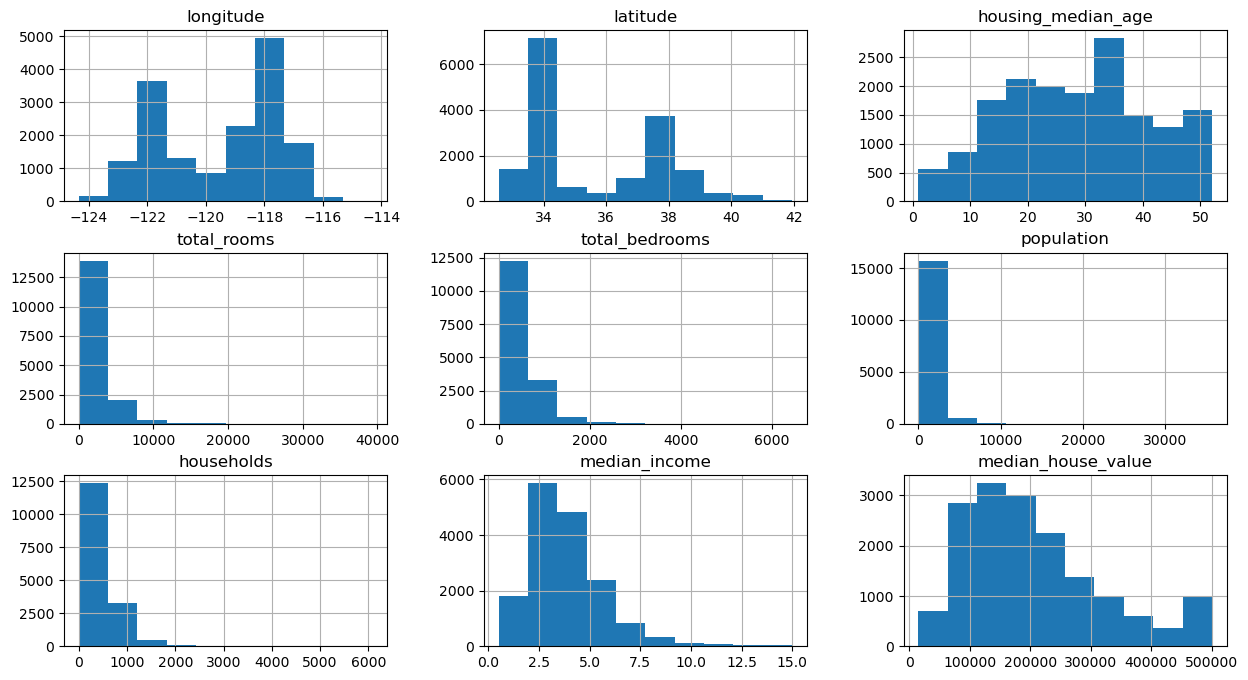

In [17]:
train_data_without_op.hist(figsize = (15, 8))

<Axes: >

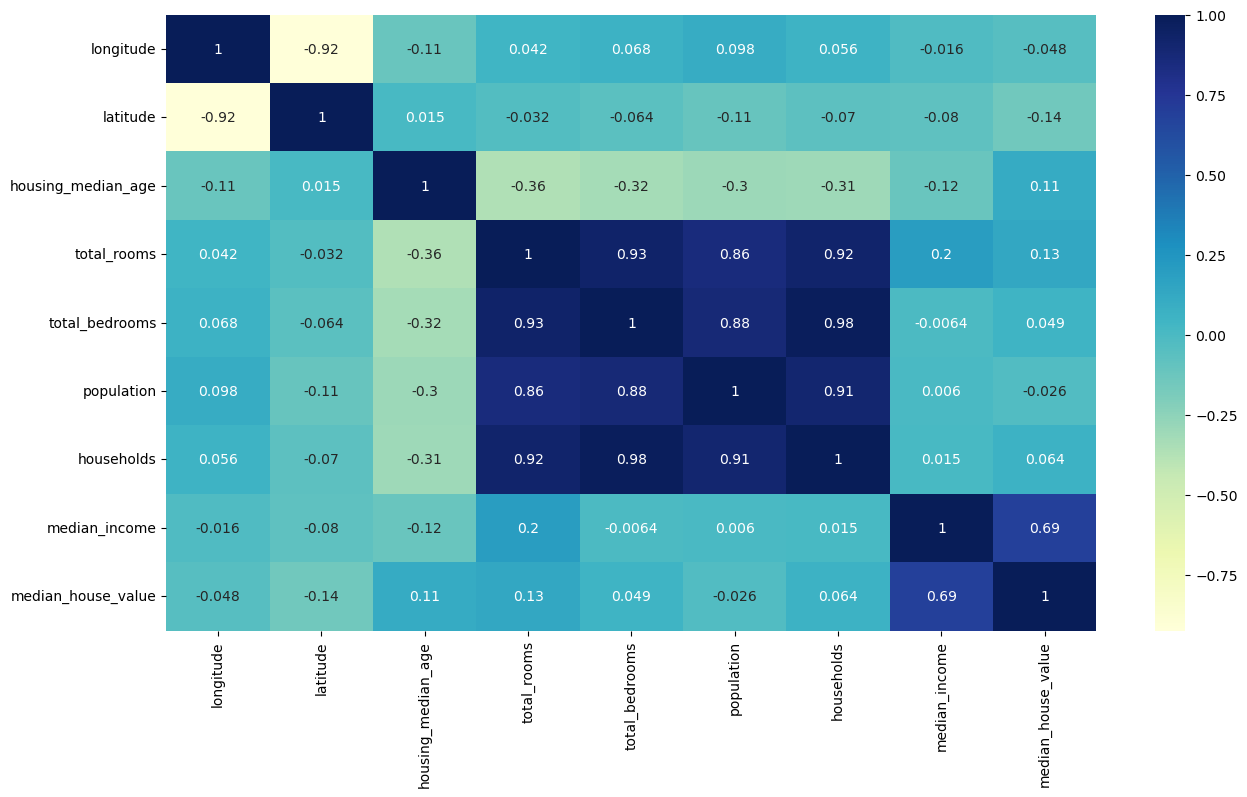

In [18]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data_without_op.corr(), annot = True, cmap = "YlGnBu")

In [19]:
transformed_households, lambda_value1 = boxcox(train_data_without_op['households'])
transformed_totalsbedrooms, lambda_value2 = boxcox(train_data_without_op['total_bedrooms'])
transformed_population, lambda_value3 = boxcox(train_data_without_op['population'])
transformed_totalrooms, lambda_value4 = boxcox(train_data_without_op['total_rooms'])

In [20]:
train_data_without_op['households'] = transformed_households
train_data_without_op['total_bedrooms'] = transformed_totalsbedrooms
train_data_without_op['total_rooms'] = transformed_totalrooms
train_data_without_op['population'] = transformed_population

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

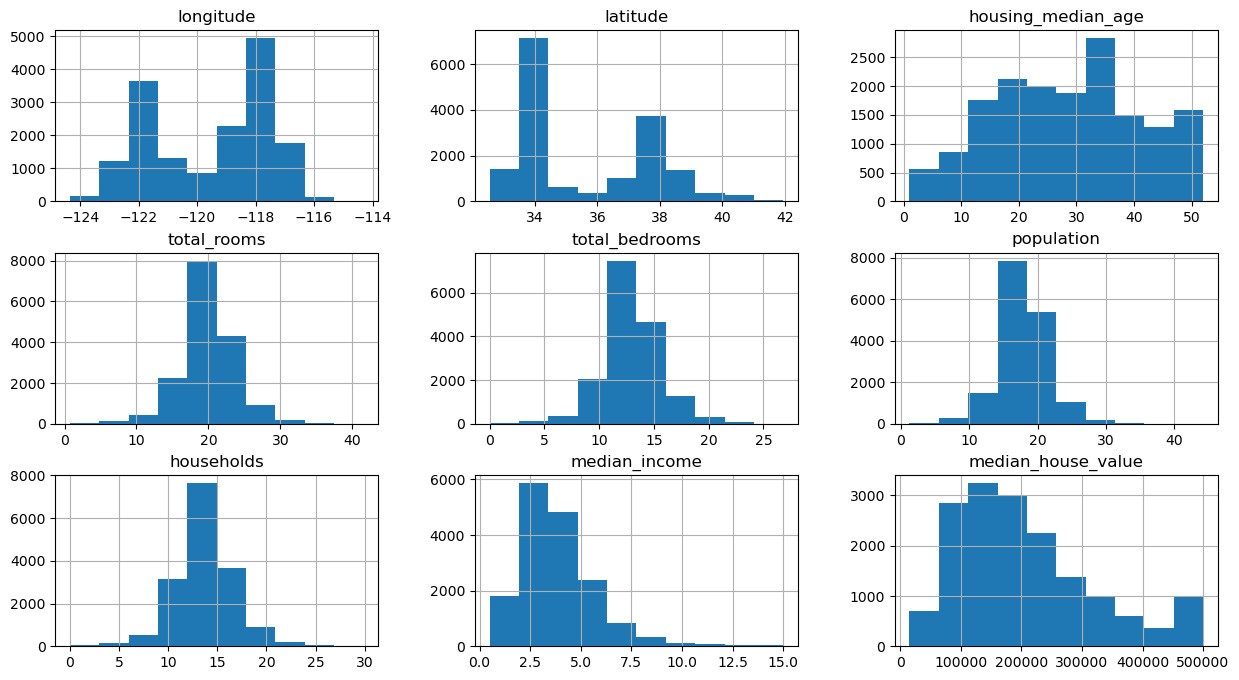

In [21]:
train_data_without_op.hist(figsize = (15, 8))

# Start preprocess

In [22]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [24]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
284,False,False,False,True,False
14129,False,False,False,False,True
18069,True,False,False,False,False
10955,True,False,False,False,False
17641,True,False,False,False,False
...,...,...,...,...,...
196,False,False,False,True,False
11201,True,False,False,False,False
9407,False,False,False,True,False
20152,True,False,False,False,False


In [25]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [26]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [27]:
transformed_households, lambda_value4 = boxcox(data['households'])
transformed_totalsbedrooms, lambda_value2 = boxcox(data['total_bedrooms'])
transformed_population, lambda_value3 = boxcox(data['population'])
transformed_totalrooms, lambda_value1 = boxcox(data['total_rooms'])
transformed_median_income, lambda_value1 = boxcox(data['median_income'])
power_transformer = PowerTransformer()

data[['housing_median_age']] = power_transformer.fit_transform(data[['housing_median_age']])
data['median_income'] = transformed_median_income
data['households'] = transformed_households
data['total_bedrooms'] = transformed_totalsbedrooms
data['total_rooms'] = transformed_totalrooms
data['population'] = transformed_population

In [28]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,0.975975,15.711183,8.812635,12.313702,9.276867,2.339704,452600.0,False,False,False,True,False
1,-122.22,37.86,-0.567819,27.567255,17.043806,22.349787,18.837657,2.336226,358500.0,False,False,False,True,False
2,-122.24,37.85,1.760114,18.129399,10.018273,14.089610,10.438155,2.173976,352100.0,False,False,False,True,False
3,-122.25,37.85,1.760114,17.434442,10.726091,14.606008,11.216602,1.875594,341300.0,False,False,False,True,False
4,-122.25,37.85,1.760114,18.653359,11.335470,14.661511,11.859220,1.434004,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,-0.242611,18.771858,12.396339,16.544107,12.835209,0.454096,78100.0,False,True,False,False,False
20636,-121.21,39.49,-0.819243,14.695478,9.269814,12.710336,8.952949,0.980434,77100.0,False,True,False,False,False
20637,-121.22,39.43,-0.904712,20.383726,13.409430,17.422049,14.000827,0.543777,92300.0,False,True,False,False,False
20638,-121.32,39.43,-0.819243,19.348787,12.738405,15.910079,13.069100,0.642702,84700.0,False,True,False,False,False


In [29]:
data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']] = data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].astype(int)

In [30]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,0.975975,15.711183,8.812635,12.313702,9.276867,2.339704,452600.0,0,0,0,1,0
1,-122.22,37.86,-0.567819,27.567255,17.043806,22.349787,18.837657,2.336226,358500.0,0,0,0,1,0
2,-122.24,37.85,1.760114,18.129399,10.018273,14.089610,10.438155,2.173976,352100.0,0,0,0,1,0
3,-122.25,37.85,1.760114,17.434442,10.726091,14.606008,11.216602,1.875594,341300.0,0,0,0,1,0
4,-122.25,37.85,1.760114,18.653359,11.335470,14.661511,11.859220,1.434004,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,-0.242611,18.771858,12.396339,16.544107,12.835209,0.454096,78100.0,0,1,0,0,0
20636,-121.21,39.49,-0.819243,14.695478,9.269814,12.710336,8.952949,0.980434,77100.0,0,1,0,0,0
20637,-121.22,39.43,-0.904712,20.383726,13.409430,17.422049,14.000827,0.543777,92300.0,0,1,0,0,0
20638,-121.32,39.43,-0.819243,19.348787,12.738405,15.910079,13.069100,0.642702,84700.0,0,1,0,0,0


In [31]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
train_data = X_train.join(y_train)

<Axes: >

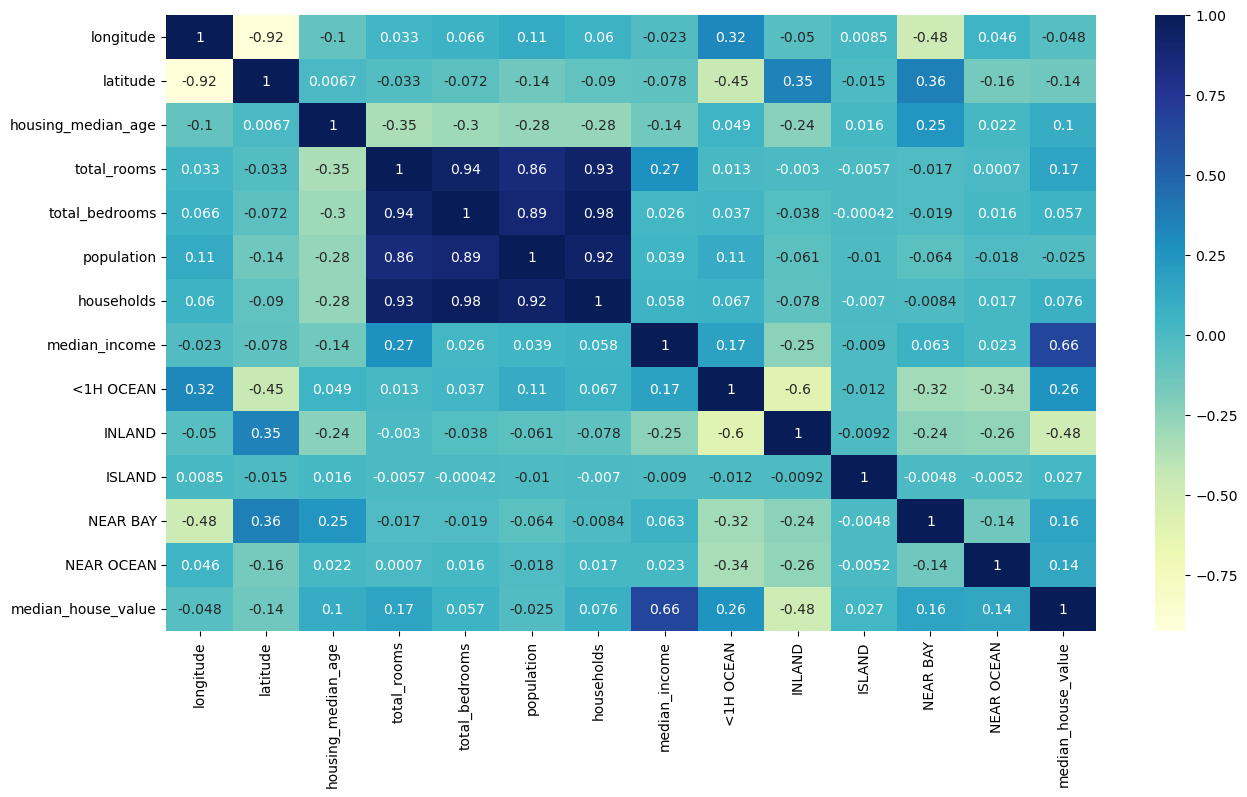

In [34]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [35]:
Scaler = StandardScaler()

In [36]:
X_train_scaler = Scaler.fit_transform(X_train)
X_test_scaler = Scaler.transform(X_test)
X_validate_scaler = Scaler.transform(X_validate)

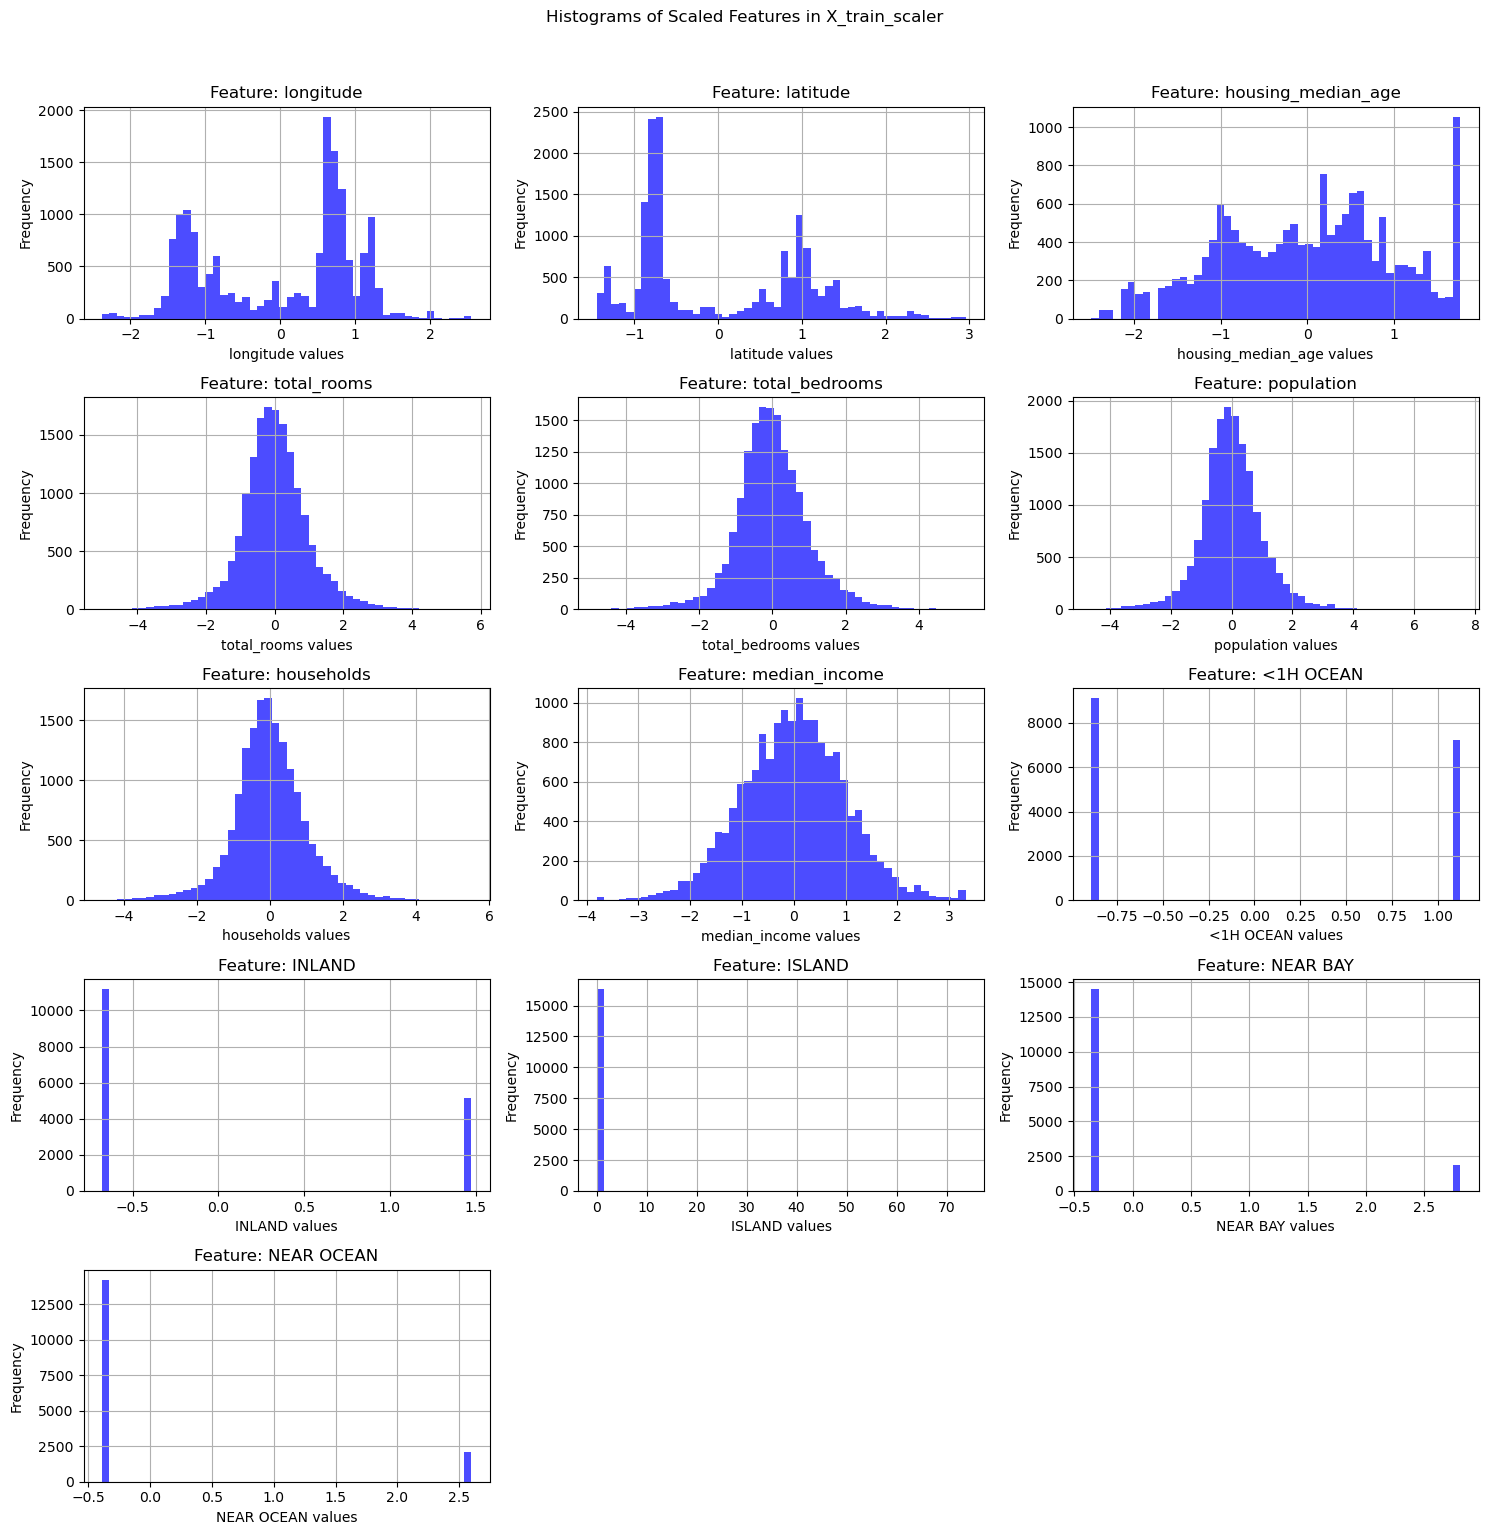

In [37]:
num_features = X_train_scaler.shape[1]
num_cols = 3  
num_rows = -(-num_features // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
fig.suptitle('Histograms of Scaled Features in X_train_scaler', y=1.02)

for i in range(num_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].hist(X_train_scaler[:, i], bins=50, color='blue', alpha=0.7)
    axes[row_idx, col_idx].set_title(f'Feature: {X.columns[i]}')
    axes[row_idx, col_idx].set_xlabel(f'{X.columns[i]} values')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].grid(True)

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# End preprocess

## Linear Regression 

In [38]:
reg = LinearRegression()

In [39]:
reg.fit(X_train_scaler, y_train)

LinearRegression()

In [40]:
reg.score(X_validate_scaler, y_validate)

0.6343039688867694

In [41]:
y_pred = reg.predict(X_test_scaler)

In [42]:
mean_squared_error(y_test, y_pred)

5333898718.741265

In [148]:
mean_absolute_error(y_test, y_pred)

54953.81020012806

In [151]:
reg_lasso = Lasso(alpha = 10, max_iter = 10000)

In [152]:
reg_lasso.fit(X_train_scaler, y_train)

Lasso(alpha=10, max_iter=10000)

In [153]:
reg_lasso.score(X_validate_scaler, y_validate)

0.6343542038876375

In [154]:
reg_lasso.coef_

array([-59676.99169666, -62246.5646626 ,  13243.95435673, -19533.20642397,
        58945.65517058, -61770.98191072,  22588.6250195 ,  72637.78418058,
         1064.57638915, -15512.34520684,   2461.51756236,  -1794.79450025,
            0.        ])

## Random forest

In [66]:
forest = RandomForestRegressor()

In [67]:
forest.fit(X_train_scaler, y_train)

RandomForestRegressor()

In [68]:
forest.score(X_validate_scaler, y_validate)

0.8291068295864223

In [69]:
y_pred = forest.predict(X_test_scaler)
print(mean_absolute_error(y_test, y_pred))

31562.313292563602


In [41]:
param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_features" : [6, 10, 13],
    "min_samples_split":[2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6, 10, 13],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=200)

In [43]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=200)


In [44]:
best_forest = grid_search.best_estimator_

In [45]:
best_forest.score(X_validate_scaler, y_validate)

0.8280786742612153

## Neural network

In [155]:
nn = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver = 'adam',
                  max_iter=10000, random_state=42, learning_rate_init = 0.001)

nn.fit(X_train_scaler, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=10000, random_state=42)

In [156]:
nn.score(X_validate_scaler, y_validate)

0.791332562369374

In [157]:
param_grid = {
    "hidden_layer_sizes" : [(50, 50), (100, ), (50, )]
}

grid_search = GridSearchCV(nn, param_grid, cv = 3, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_scaler, y_train)

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic O

GridSearchCV(cv=3,
             estimator=MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=10000,
                                    random_state=42),
             param_grid={'hidden_layer_sizes': [(50, 50), (100,), (50,)]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [158]:
print(grid_search.best_estimator_)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=10000, random_state=42)


In [43]:
nn_iden =  MLPRegressor(hidden_layer_sizes=(50, 50), activation='identity',
                  max_iter=5000, learning_rate_init=0.001, random_state=42)
nn_iden.fit(X_train_scaler, y_train)
nn_iden.score(X_validate_scaler, y_validate)

0.6347182072202706

## KNN

In [44]:
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')

knn.fit(X_train_scaler, y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [45]:
knn.score(X_validate_scaler, y_validate)

0.7296789982772351

In [40]:
param_grid = {
    'n_neighbors': [8, 39, 40, 41, 50, 51, 52, 70, 71, 72, 100, 101, 102, 200, 300, 400, 500, 1000, 1500, 2000, 2500] 
}

In [41]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=4, weights='distance'),
             param_grid={'n_neighbors': [8, 39, 40, 41, 50, 51, 52, 70, 71, 72,
                                         100, 101, 102, 200, 300, 400, 500,
                                         1000, 1500, 2000, 2500]},
             scoring='neg_mean_absolute_error')

In [42]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=8, weights='distance')

In [43]:
best_knn = grid_search.best_estimator_

In [44]:
print(best_knn)

KNeighborsRegressor(n_neighbors=8, weights='distance')


In [45]:
best_knn.score(X_validate_scaler, y_validate)

0.7400829604693633

In [47]:
y_pred = best_knn.predict(X_test_scaler)

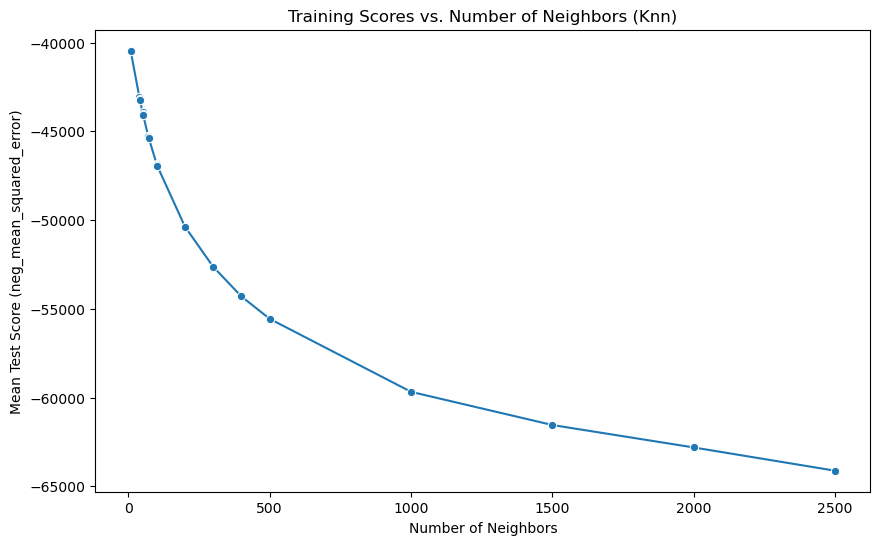

In [48]:
results = pd.DataFrame(grid_search.cv_results_)

param_cols = ['param_n_neighbors', 'mean_test_score']
subset = results[param_cols].copy()  

subset['param_n_neighbors'] = subset['param_n_neighbors'].astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Number of Neighbors (Knn)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score (neg_mean_squared_error)')

plt.show()

In [50]:
knn_changeMetric = KNeighborsRegressor(n_neighbors=8, weights='distance')

In [51]:
param_grid = {
    'metric': ['euclidean', 'manhattan','chebyshev', 'minkowski'] 
}

In [52]:
grid_search = GridSearchCV(knn_changeMetric, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaler, y_train)  

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=8, weights='distance'),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']},
             scoring='neg_mean_absolute_error')

In [53]:
grid_search.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')

In [54]:
best_knn_changeMetric = grid_search.best_estimator_
print(best_knn_changeMetric)

KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')


In [55]:
best_knn_changeMetric.score(X_validate_scaler, y_validate)

0.7433565689280863

Index(['param_metric', 'mean_test_score'], dtype='object')
object


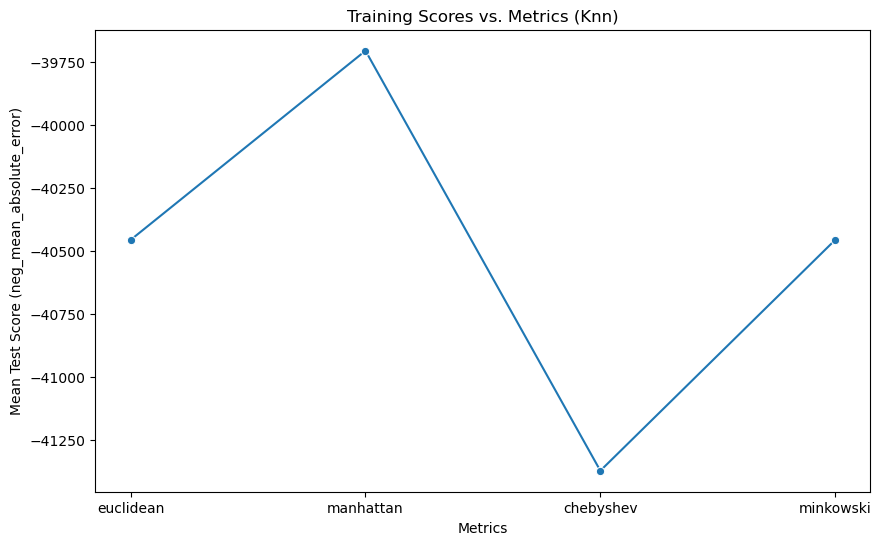

In [58]:
results = pd.DataFrame(grid_search.cv_results_)

subset = results[['param_metric', 'mean_test_score']]

print(subset.columns)
print(subset['param_metric'].dtype)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_metric', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Metrics (Knn)')
plt.xlabel('Metrics')
plt.ylabel('Mean Test Score (neg_mean_absolute_error)')

plt.show()

## SVM

In [59]:
svm_reg = svm.SVR()

In [60]:
pipeline = make_pipeline(StandardScaler(), svm_reg)

In [61]:
param_grid = {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.01, 0.1, 0.2], 'svr__kernel': ['linear', 'rbf']}

In [62]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__epsilon': [0.01, 0.1, 0.2],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [63]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

svr_best = grid_search.best_estimator_
y_pred_svr = svr_best.predict(X_test)

Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.2, 'svr__kernel': 'linear'}


D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [64]:
svr_best.score(X_validate_scaler, y_validate)

0.47304500621186163

In [65]:
svr_best.predict(X_test_scaler)

array([201309.4363758 , 215294.43716542, 128091.98279777, ...,
       199979.87124068, 117405.09307775, 209486.71259991])

## Predict on test set

In [74]:
best_ridge.predict(X_test_scaler)

array([252617.76573329, 276497.66092492, 123348.54912679, ...,
       246215.48700232, 120618.41090289, 177787.96686613])

In [75]:
best_forest.predict(X_test_scaler)

array([202792.04, 372078.11, 105059.  , ..., 276317.06, 103574.  ,
       100253.  ])

In [76]:
nn.predict(X_test_scaler)

array([199389.22944828, 344913.86136946,  99668.70220338, ...,
       259323.19141944, 153304.97578508,  99592.2095619 ])

In [77]:
best_knn.predict(X_test_scaler)

array([127986.51621699, 281176.76761233,  88977.54618983, ...,
       148662.37632542, 157722.69674435,  82254.67837296])

In [117]:
svr_best.predict(X_test_scaler)

array([196448.07320148, 209060.01771138, 120317.15265348, ...,
       191890.97965371, 141334.6481915 , 203773.16465844])

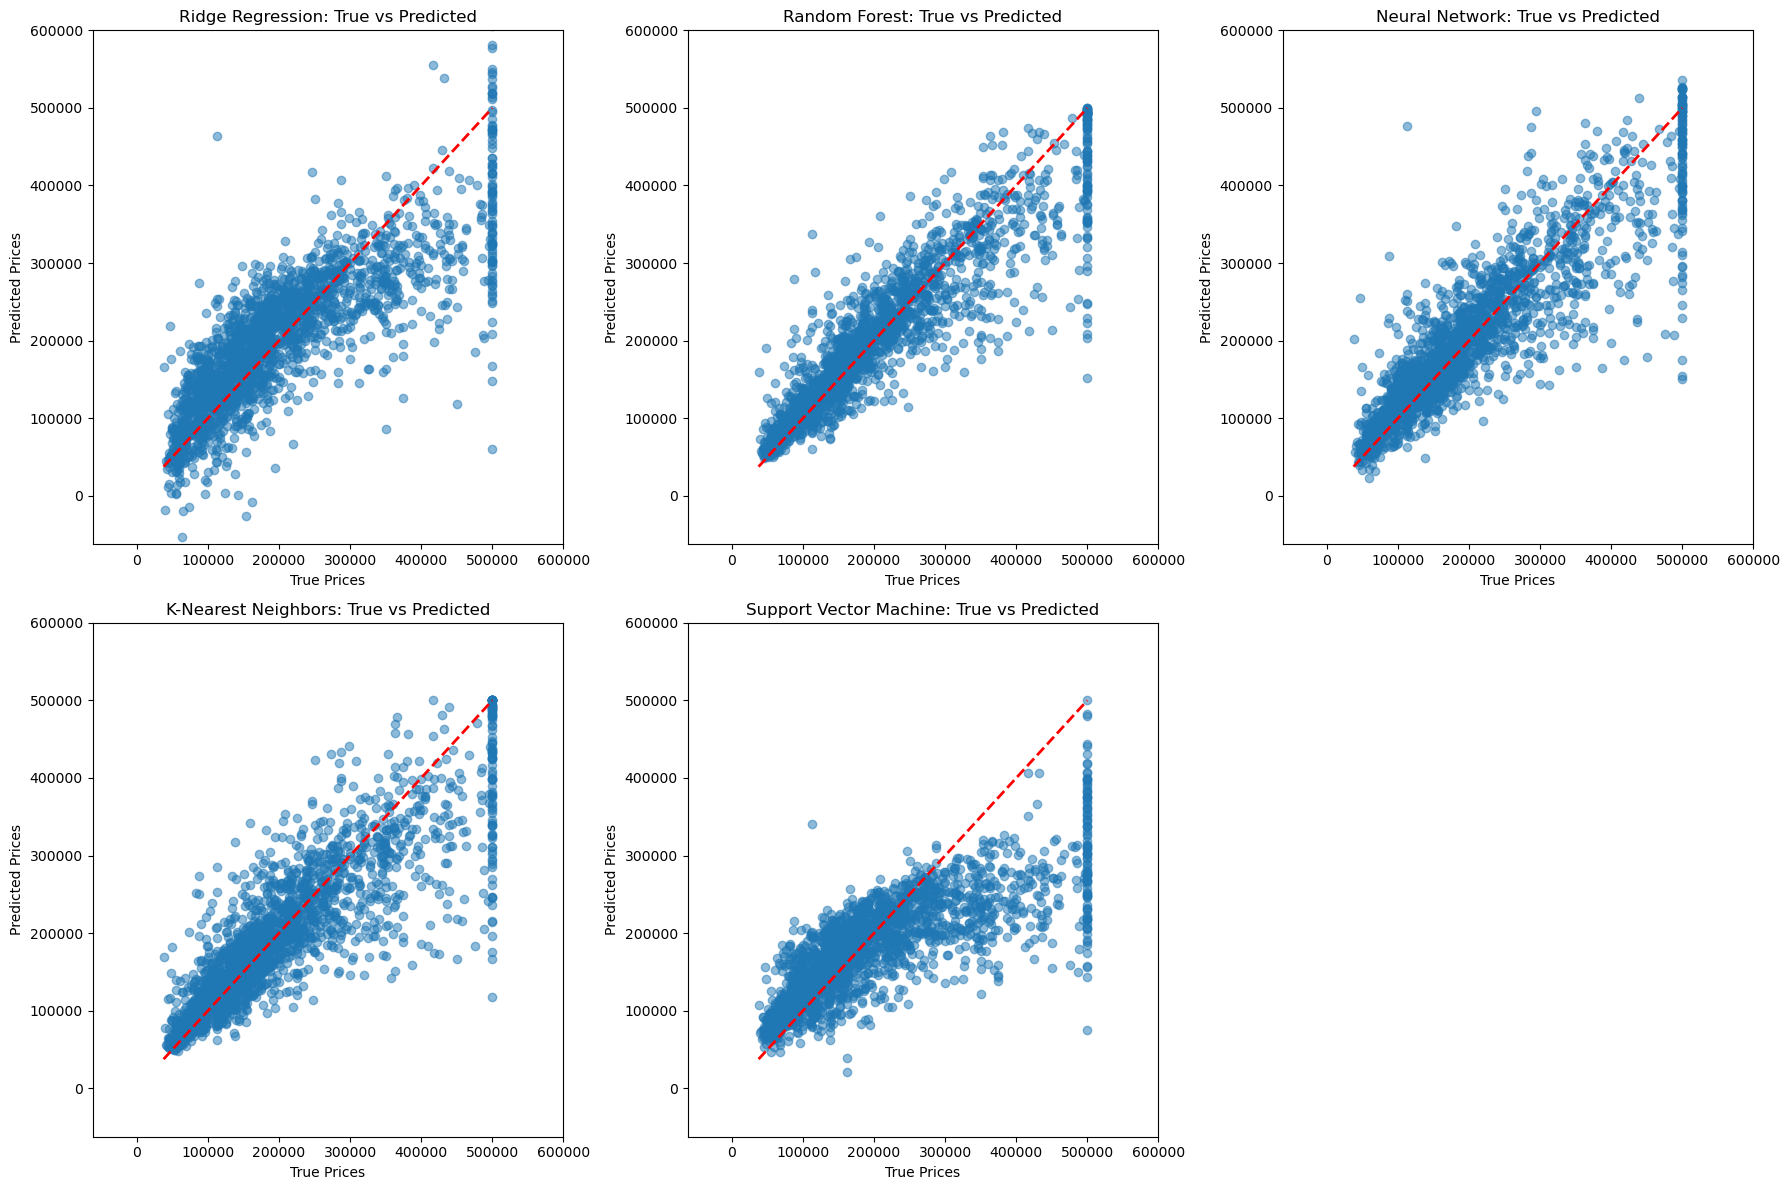

In [113]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.scatter(y_test, ridge_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  
plt.title('Ridge Regression: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 2)
plt.scatter(y_test, forest_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 3)
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('Neural Network: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 4)
plt.scatter(y_test, knn_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('K-Nearest Neighbors: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 5)
plt.scatter(y_test, svm_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('Support Vector Machine: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.tight_layout()
plt.show()
